In [7]:
print("PRAISE THE LORD ALMIGHTY FATHER Thank You JESUS Praise You JESUS Forever May the HOLY SPIRIT Guide Us MOTHER MARY PRAY For Us SAINT JOSEPH, PRAY For Us SAINT ANTHONY PRAY For Us GOD BLESS !!! 🧡⛪✝⛪🧡")

PRAISE THE LORD ALMIGHTY FATHER Thank You JESUS Praise You JESUS Forever May the HOLY SPIRIT Guide Us MOTHER MARY PRAY For Us SAINT JOSEPH, PRAY For Us SAINT ANTHONY PRAY For Us GOD BLESS !!! 🧡⛪✝⛪🧡


In [8]:
import pandas as pd

### This would analyse all the features and Produce WTTE - RNN with advanced featured and advanced RNN More Advance MOdel



In [9]:
df_matches = pd.read_csv('2022_to_2023_all_matches_preprocessed_v1.csv')


In [10]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 67 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0.1                               19110 non-null  int64  
 1   Unnamed: 0                                 19110 non-null  int64  
 2   year                                       19110 non-null  object 
 3   over_start_bowler_balls_bowled             19110 non-null  int64  
 4   over_start_bowler_wickets_taken            19110 non-null  int64  
 5   over_start_bowler_runs_given               19110 non-null  int64  
 6   over_start_batsman_on_strike_fours         19110 non-null  int64  
 7   over_start_batsman_on_strike_sixers        19110 non-null  int64  
 8   over_start_batsman_off_strike_balls_faced  19110 non-null  int64  
 9   over_start_batsman_on_strike_balls_faced   19110 non-null  int64  
 10  over_start_batsman_off

### Create A Method to Analyse the Time To Event and Uncencored


In [11]:
df_matches = df_matches[['date','over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings','target', 'req_run_rate',
       'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over','wickets_fallen', 'sixers', 'fours', 'total_runs','bat_on_str_Ave', 'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50',
       'bat_on_str_0', 'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat',
       'bat_on_str_Inns', 'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS',
       'bat_on_str_BF', 'bowler_Mat', 'bowler_Inns', 'bowler_Overs',
       'bowler_Mdns', 'bowler_Runs', 'bowler_Wkts', 'bowler_Ave',
       'bowler_Econ', 'bowler_SR', 'bowler_4w', 'bowler_5w', 'bat_off_str_Ave',
       'bat_off_str_SR', 'bat_off_str_100','bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s', 'bat_off_str_6s',
       'bat_off_str_Mat', 'bat_off_str_Inns', 'bat_off_str_NO',
       'bat_off_str_Runs', 'bat_off_str_HS', 'bat_off_str_BF','y_is_wicket_fallen', 'match_num',]]

df_matches

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,...,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num
0,2015-11-26,0,0,0,0,0,0,0,0,0,...,114.000000,35.000000,35.000000,35.000000,5.000000,1092.000000,116.000000,797.0000,0,468
1,2015-11-26,0,0,0,0,0,3,3,1,4,...,114.000000,35.000000,35.000000,35.000000,5.000000,1092.000000,116.000000,797.0000,1,468
2,2015-11-26,6,0,5,1,0,0,6,0,6,...,69.178322,28.380821,36.585675,32.818811,5.740116,771.773217,69.867867,589.3779,1,468
3,2015-11-26,7,1,11,0,0,3,0,0,0,...,14.000000,4.000000,8.000000,8.000000,1.000000,129.000000,72.000000,101.0000,1,468
4,2015-11-26,12,1,7,0,0,1,2,0,0,...,105.000000,51.000000,52.000000,51.000000,10.000000,1225.000000,85.000000,914.0000,0,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,...,10.000000,2.000000,2.000000,2.000000,0.000000,104.000000,63.000000,78.0000,1,665
19106,2018-04-03,12,1,15,0,0,20,1,21,1,...,10.000000,2.000000,2.000000,2.000000,0.000000,104.000000,63.000000,78.0000,0,665
19107,2018-04-03,12,1,26,2,0,6,21,2,22,...,1.000000,1.000000,2.000000,2.000000,0.000000,15.000000,14.000000,10.0000,0,665
19108,2018-04-03,18,1,21,1,0,24,11,26,8,...,10.000000,2.000000,2.000000,2.000000,0.000000,104.000000,63.000000,78.0000,0,665


In [12]:
df_matches['date'] = pd.to_datetime(df_matches['date'])
df_matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 60 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   date                                       19110 non-null  datetime64[ns]
 1   over_start_bowler_balls_bowled             19110 non-null  int64         
 2   over_start_bowler_wickets_taken            19110 non-null  int64         
 3   over_start_bowler_runs_given               19110 non-null  int64         
 4   over_start_batsman_on_strike_fours         19110 non-null  int64         
 5   over_start_batsman_on_strike_sixers        19110 non-null  int64         
 6   over_start_batsman_off_strike_balls_faced  19110 non-null  int64         
 7   over_start_batsman_on_strike_balls_faced   19110 non-null  int64         
 8   over_start_batsman_offstrike_runs          19110 non-null  int64         
 9   over_start_batsma

In [13]:
# Filter the DataFrame for values greater than a specific date
specific_date = pd.to_datetime('2017-01-01')
df_matches = df_matches[df_matches['date'] > specific_date]

In [24]:
df_final = df_matches[['date','over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'target', 'req_run_rate','over_start_run_rate',
       'over_start_total_score','over_start_total_wickets_fallen', 'over','wickets_fallen', 'sixers', 'fours', 'total_runs','bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       'bowler_4w', 'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR',
       'bat_off_str_100', 'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s',
       'bat_off_str_6s', 'bat_off_str_Mat', 'bat_off_str_Inns',
       'bat_off_str_NO', 'bat_off_str_Runs', 'bat_off_str_HS',
       'bat_off_str_BF','y_is_wicket_fallen','match_num']]

In [25]:
cols_to_scale = ['over_start_bowler_balls_bowled', 'over_start_bowler_wickets_taken',
       'over_start_bowler_runs_given', 'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'over_start_run_rate', 'target', 'req_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over','wickets_fallen', 'sixers', 'fours','bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       'bowler_4w', 'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR',
       'bat_off_str_100', 'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s',
       'bat_off_str_6s', 'bat_off_str_Mat', 'bat_off_str_Inns',
       'bat_off_str_NO', 'bat_off_str_Runs', 'bat_off_str_HS',
       'bat_off_str_BF',]


In [26]:
## Adding the TTE And Uncencored Columns

In [27]:
import numpy as np
df_final.insert(loc=len(df_final.columns), column='time_to_event', value=np.ones(len(df_final)))
df_final.insert(loc=len(df_final.columns), column='uncencored', value=np.ones(len(df_final)))


In [28]:
match_list = df_matches['match_num'].unique()
match_list_1 =match_list[0:1] 
match_list_1

array([1361], dtype=int64)

In [29]:


for match in match_list:
    print("In new Match" , match)
    for i in range(1,3):
        print("In new Innings" , i)
        innings_df = df_final[(df_final['match_num'] == match) & (df_final['innings'] == i)]
        event_index = innings_df.index[innings_df['y_is_wicket_fallen'] == 1]
        print(event_index)
        next_wicket_index = 0

        print(type(event_index))
        event_index = np.append(event_index,innings_df.index[len(innings_df.index)-1])
        # if len(event_index) == 0:
        #     event_index = np.append(event_index,innings_df.index[len(innings_df.index)-1])
        #     print("Empty event index replaced by ",event_index)


        for index in innings_df.index:
            #print(index)
            
            #print(df_final[(df_final['match_num'] == match) & (df_final['innings'] == i)]['y_is_wicket_fallen'][index])
            df_final['time_to_event'][index] = event_index[next_wicket_index] - index
            print(df_final['time_to_event'][index])
            print('tte is ' , event_index[next_wicket_index] - index)
            if index == event_index[next_wicket_index]:
                next_wicket_index = next_wicket_index +1

In new Match 1361
In new Innings 1
Int64Index([40, 42, 45, 52, 57, 58, 59], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
0.0
tte is  0
1.0
tte is  1
0.0
tte is  0
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
6.0
tte is  6
5.0
tte is  5
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
0.0
tte is  0
0.0
tte is  0
In new Innings 2
Int64Index([], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
17.0
tte is  17
16.0
tte is  16
15.0
tte is  15
14.0
tte is  14
13.0
tte is  13
12.0
tte is  12
11.0
tte is  11
10.0
tte is  10
9.0
tte is  9
8.0
tte is  8
7.0
tte is  7
6.0
tte is  6
5.0
tte is  5
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
In new Match 1374
In new Innings 1
Int64Index([80, 87, 88, 89, 90, 95], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
6.0
tte is  6
5.0
tte is  5
4.0
tte is

C:\Users\Arul\AppData\Local\Temp\ipykernel_17796\3086716220.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['time_to_event'][index] = event_index[next_wicket_index] - index


0.0
tte is  0
0.0
tte is  0
0.0
tte is  0
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
0.0
tte is  0
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
1.0
tte is  1
0.0
tte is  0
1.0
tte is  1
0.0
tte is  0
In new Innings 2
Int64Index([288, 289], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
0.0
tte is  0
0.0
tte is  0
In new Match 1398
In new Innings 1
Int64Index([293, 294, 300, 303, 308, 310], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
0.0
tte is  0
5.0
tte is  5
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
1.0
tte is  1
0.0
tte is  0
In new Innings 2
Int64Index([314, 326], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
11.0
t

In [30]:
df_final

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,...,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
40,2021-10-24,0,0,0,0,0,0,0,0,0,...,111.0,103.0,15.0,2864.0,118.0,2061.0,1,1361,0.0,1.0
41,2021-10-24,0,0,0,0,0,3,2,1,1,...,49.0,45.0,6.0,1557.0,110.0,1095.0,0,1361,1.0,1.0
42,2021-10-24,6,1,2,0,0,4,7,3,3,...,90.0,84.0,24.0,3159.0,94.0,2272.0,1,1361,0.0,1.0
43,2021-10-24,6,0,4,0,0,4,5,7,4,...,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,2.0,1.0
44,2021-10-24,12,2,10,0,0,6,9,11,6,...,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,...,2.0,2.0,0.0,104.0,63.0,78.0,1,665,0.0,1.0
19106,2018-04-03,12,1,15,0,0,20,1,21,1,...,2.0,2.0,0.0,104.0,63.0,78.0,0,665,3.0,1.0
19107,2018-04-03,12,1,26,2,0,6,21,2,22,...,2.0,2.0,0.0,15.0,14.0,10.0,0,665,2.0,1.0
19108,2018-04-03,18,1,21,1,0,24,11,26,8,...,2.0,2.0,0.0,104.0,63.0,78.0,0,665,1.0,1.0


In [31]:
df_final['time_to_event'] = df_final['time_to_event'].apply(lambda x: x + 1)


In [32]:
df_final.columns

Index(['date', 'over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'wickets_fallen', 'sixers', 'fours', 'total_runs', 'bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       '

In [33]:
df_final

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,...,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
40,2021-10-24,0,0,0,0,0,0,0,0,0,...,111.0,103.0,15.0,2864.0,118.0,2061.0,1,1361,1.0,1.0
41,2021-10-24,0,0,0,0,0,3,2,1,1,...,49.0,45.0,6.0,1557.0,110.0,1095.0,0,1361,2.0,1.0
42,2021-10-24,6,1,2,0,0,4,7,3,3,...,90.0,84.0,24.0,3159.0,94.0,2272.0,1,1361,1.0,1.0
43,2021-10-24,6,0,4,0,0,4,5,7,4,...,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,3.0,1.0
44,2021-10-24,12,2,10,0,0,6,9,11,6,...,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,...,2.0,2.0,0.0,104.0,63.0,78.0,1,665,1.0,1.0
19106,2018-04-03,12,1,15,0,0,20,1,21,1,...,2.0,2.0,0.0,104.0,63.0,78.0,0,665,4.0,1.0
19107,2018-04-03,12,1,26,2,0,6,21,2,22,...,2.0,2.0,0.0,15.0,14.0,10.0,0,665,3.0,1.0
19108,2018-04-03,18,1,21,1,0,24,11,26,8,...,2.0,2.0,0.0,104.0,63.0,78.0,0,665,2.0,1.0


In [34]:
train_test_Date = pd.to_datetime('2022-01-01')


In [35]:
from sklearn.model_selection import train_test_split
X_train = df_final[df_final['date'] <= train_test_Date]


In [36]:
pd.set_option('display.max_columns', None)


In [37]:
X_train

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
40,2021-10-24,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,1.0,0.0,0.0,2.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,32.54,138.96,4.0,22.0,6.0,252.0,133.0,111.0,103.0,15.0,2864.0,118.0,2061.0,1,1361,1.0,1.0
41,2021-10-24,0,0,0,0,0,3,2,1,1,1,210,8.000000,2.000000,2,1,1,0.0,0.0,0.0,4.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,0,1361,2.0,1.0
42,2021-10-24,6,1,2,0,0,4,7,3,3,1,210,8.000000,3.000000,6,1,2,1.0,1.0,0.0,8.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,1,1361,1.0,1.0
43,2021-10-24,6,0,4,0,0,4,5,7,4,1,210,8.000000,4.666667,14,2,3,0.0,0.0,1.0,7.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,3.0,1.0
44,2021-10-24,12,2,10,0,0,6,9,11,6,1,210,8.000000,5.250000,21,2,4,0.0,1.0,0.0,9.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,2,154,5.875000,8.916667,107,1,12,1.0,0.0,1.0,7.0,53.15,127.49,0.0,4.0,0.0,67.0,9.0,19.0,19.0,6.0,691.0,97.0,542.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,1,665,1.0,1.0
19106,2018-04-03,12,1,15,0,0,20,1,21,1,2,154,5.714286,8.769231,114,2,13,0.0,0.0,0.0,6.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665,4.0,1.0
19107,2018-04-03,12,1,26,2,0,6,21,2,22,2,154,5.666667,8.571429,120,2,14,0.0,0.0,1.0,12.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,0,665,3.0,1.0
19108,2018-04-03,18,1,21,1,0,24,11,26,8,2,154,4.400000,8.800000,132,2,15,0.0,0.0,0.0,7.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665,2.0,1.0


In [38]:
test_Date = pd.to_datetime('2022-01-01')
X_test  =  df_final[df_final['date'] > test_Date]
X_test

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
798,2022-01-29,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,0.0,0.0,1.0,7.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,0,1456,2.0,1.0
799,2022-01-29,0,0,0,0,0,2,4,4,3,1,210,10.000000,7.000000,7,0,1,1.0,0.0,0.0,1.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,1,1456,1.0,1.0
800,2022-01-29,6,0,7,0,0,0,8,0,4,1,210,8.000000,4.000000,8,1,2,0.0,0.0,1.0,5.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,1456,10.0,1.0
801,2022-01-29,6,1,1,1,0,2,12,0,9,1,210,8.000000,4.333333,13,1,3,0.0,0.0,0.0,2.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,1456,9.0,1.0
802,2022-01-29,12,0,12,0,0,18,2,11,0,1,210,8.000000,3.750000,15,1,4,0.0,1.0,2.0,17.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,0,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,2023-01-07,9,0,15,0,0,7,3,5,4,2,229,16.000000,8.416667,101,5,12,1.0,0.0,1.0,6.0,20.54,113.34,0.0,3.0,2.0,54.0,10.0,35.0,34.0,3.0,637.0,66.0,562.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,1,1986,1.0,1.0
5913,2023-01-07,13,2,15,0,0,0,8,0,6,2,229,17.428571,8.230769,107,6,13,0.0,2.0,0.0,15.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,73.0,72.0,271.0,1.0,2212.0,88.0,25.13,8.16,18.4,2.0,1.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,0,1986,2.0,1.0
5914,2023-01-07,20,1,27,0,2,0,14,0,21,2,229,17.833333,8.714286,122,6,14,1.0,0.0,0.0,3.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,83.0,72.0,208.5,1.0,1720.0,62.0,27.74,8.23,20.2,2.0,0.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,1,1986,1.0,1.0
5915,2023-01-07,15,1,21,0,2,3,15,2,22,2,229,20.800000,8.333333,125,7,15,1.0,0.0,2.0,10.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,4.57,86.48,0.0,0.0,3.0,1.0,2.0,34.0,13.0,6.0,32.0,11.0,37.0,1,1986,1.0,1.0


In [39]:
df_matches.columns

Index(['date', 'over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'wickets_fallen', 'sixers', 'fours', 'total_runs', 'bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       '

In [40]:
X_test

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
798,2022-01-29,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,0.0,0.0,1.0,7.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,0,1456,2.0,1.0
799,2022-01-29,0,0,0,0,0,2,4,4,3,1,210,10.000000,7.000000,7,0,1,1.0,0.0,0.0,1.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,1,1456,1.0,1.0
800,2022-01-29,6,0,7,0,0,0,8,0,4,1,210,8.000000,4.000000,8,1,2,0.0,0.0,1.0,5.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,1456,10.0,1.0
801,2022-01-29,6,1,1,1,0,2,12,0,9,1,210,8.000000,4.333333,13,1,3,0.0,0.0,0.0,2.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,1456,9.0,1.0
802,2022-01-29,12,0,12,0,0,18,2,11,0,1,210,8.000000,3.750000,15,1,4,0.0,1.0,2.0,17.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,0,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,2023-01-07,9,0,15,0,0,7,3,5,4,2,229,16.000000,8.416667,101,5,12,1.0,0.0,1.0,6.0,20.54,113.34,0.0,3.0,2.0,54.0,10.0,35.0,34.0,3.0,637.0,66.0,562.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,1,1986,1.0,1.0
5913,2023-01-07,13,2,15,0,0,0,8,0,6,2,229,17.428571,8.230769,107,6,13,0.0,2.0,0.0,15.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,73.0,72.0,271.0,1.0,2212.0,88.0,25.13,8.16,18.4,2.0,1.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,0,1986,2.0,1.0
5914,2023-01-07,20,1,27,0,2,0,14,0,21,2,229,17.833333,8.714286,122,6,14,1.0,0.0,0.0,3.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,83.0,72.0,208.5,1.0,1720.0,62.0,27.74,8.23,20.2,2.0,0.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,1,1986,1.0,1.0
5915,2023-01-07,15,1,21,0,2,3,15,2,22,2,229,20.800000,8.333333,125,7,15,1.0,0.0,2.0,10.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,4.57,86.48,0.0,0.0,3.0,1.0,2.0,34.0,13.0,6.0,32.0,11.0,37.0,1,1986,1.0,1.0


In [41]:
X_train

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
40,2021-10-24,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,1.0,0.0,0.0,2.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,32.54,138.96,4.0,22.0,6.0,252.0,133.0,111.0,103.0,15.0,2864.0,118.0,2061.0,1,1361,1.0,1.0
41,2021-10-24,0,0,0,0,0,3,2,1,1,1,210,8.000000,2.000000,2,1,1,0.0,0.0,0.0,4.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,0,1361,2.0,1.0
42,2021-10-24,6,1,2,0,0,4,7,3,3,1,210,8.000000,3.000000,6,1,2,1.0,1.0,0.0,8.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,1,1361,1.0,1.0
43,2021-10-24,6,0,4,0,0,4,5,7,4,1,210,8.000000,4.666667,14,2,3,0.0,0.0,1.0,7.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,3.0,1.0
44,2021-10-24,12,2,10,0,0,6,9,11,6,1,210,8.000000,5.250000,21,2,4,0.0,1.0,0.0,9.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,2,154,5.875000,8.916667,107,1,12,1.0,0.0,1.0,7.0,53.15,127.49,0.0,4.0,0.0,67.0,9.0,19.0,19.0,6.0,691.0,97.0,542.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,1,665,1.0,1.0
19106,2018-04-03,12,1,15,0,0,20,1,21,1,2,154,5.714286,8.769231,114,2,13,0.0,0.0,0.0,6.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665,4.0,1.0
19107,2018-04-03,12,1,26,2,0,6,21,2,22,2,154,5.666667,8.571429,120,2,14,0.0,0.0,1.0,12.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,0,665,3.0,1.0
19108,2018-04-03,18,1,21,1,0,24,11,26,8,2,154,4.400000,8.800000,132,2,15,0.0,0.0,0.0,7.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665,2.0,1.0


In [42]:
# df = df_matches[['req_run_rate',
#        'over_start_run_rate', 'over_start_total_score',
#        'over_start_total_wickets_fallen', 'total_runs','innings','over','y_is_wicket_fallen']]

In [43]:
X_train = X_train[['over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs','innings', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'sixers', 'fours','total_runs','bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       'bowler_4w', 'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR',
       'bat_off_str_100', 'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s',
       'bat_off_str_6s', 'bat_off_str_Mat', 'bat_off_str_Inns',
       'bat_off_str_NO', 'bat_off_str_Runs', 'bat_off_str_HS',
       'bat_off_str_BF','match_num','time_to_event',
       'uncencored']]

In [44]:
X_train

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,match_num,time_to_event,uncencored
40,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,0.0,0.0,2.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,32.54,138.96,4.0,22.0,6.0,252.0,133.0,111.0,103.0,15.0,2864.0,118.0,2061.0,1361,1.0,1.0
41,0,0,0,0,0,3,2,1,1,1,210,8.000000,2.000000,2,1,1,0.0,0.0,4.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,1361,2.0,1.0
42,6,1,2,0,0,4,7,3,3,1,210,8.000000,3.000000,6,1,2,1.0,0.0,8.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,1361,1.0,1.0
43,6,0,4,0,0,4,5,7,4,1,210,8.000000,4.666667,14,2,3,0.0,1.0,7.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,1361,3.0,1.0
44,12,2,10,0,0,6,9,11,6,1,210,8.000000,5.250000,21,2,4,1.0,0.0,9.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,6,0,19,5,0,19,36,20,46,2,154,5.875000,8.916667,107,1,12,0.0,1.0,7.0,53.15,127.49,0.0,4.0,0.0,67.0,9.0,19.0,19.0,6.0,691.0,97.0,542.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,665,1.0,1.0
19106,12,1,15,0,0,20,1,21,1,2,154,5.714286,8.769231,114,2,13,0.0,0.0,6.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,665,4.0,1.0
19107,12,1,26,2,0,6,21,2,22,2,154,5.666667,8.571429,120,2,14,0.0,1.0,12.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,665,3.0,1.0
19108,18,1,21,1,0,24,11,26,8,2,154,4.400000,8.800000,132,2,15,0.0,0.0,7.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,665,2.0,1.0


In [45]:
X_test = X_test[['over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs','innings', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'sixers', 'fours','total_runs','bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       'bowler_4w', 'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR',
       'bat_off_str_100', 'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s',
       'bat_off_str_6s', 'bat_off_str_Mat', 'bat_off_str_Inns',
       'bat_off_str_NO', 'bat_off_str_Runs', 'bat_off_str_HS',
       'bat_off_str_BF','match_num','time_to_event',
       'uncencored']]

In [46]:
X_test

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,match_num,time_to_event,uncencored
798,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,0.0,1.0,7.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,1456,2.0,1.0
799,0,0,0,0,0,2,4,4,3,1,210,10.000000,7.000000,7,0,1,0.0,0.0,1.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,1456,1.0,1.0
800,6,0,7,0,0,0,8,0,4,1,210,8.000000,4.000000,8,1,2,0.0,1.0,5.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,1456,10.0,1.0
801,6,1,1,1,0,2,12,0,9,1,210,8.000000,4.333333,13,1,3,0.0,0.0,2.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,1456,9.0,1.0
802,12,0,12,0,0,18,2,11,0,1,210,8.000000,3.750000,15,1,4,1.0,2.0,17.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,9,0,15,0,0,7,3,5,4,2,229,16.000000,8.416667,101,5,12,0.0,1.0,6.0,20.54,113.34,0.0,3.0,2.0,54.0,10.0,35.0,34.0,3.0,637.0,66.0,562.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,1986,1.0,1.0
5913,13,2,15,0,0,0,8,0,6,2,229,17.428571,8.230769,107,6,13,2.0,0.0,15.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,73.0,72.0,271.0,1.0,2212.0,88.0,25.13,8.16,18.4,2.0,1.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,1986,2.0,1.0
5914,20,1,27,0,2,0,14,0,21,2,229,17.833333,8.714286,122,6,14,0.0,0.0,3.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,83.0,72.0,208.5,1.0,1720.0,62.0,27.74,8.23,20.2,2.0,0.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,1986,1.0,1.0
5915,15,1,21,0,2,3,15,2,22,2,229,20.800000,8.333333,125,7,15,0.0,2.0,10.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,4.57,86.48,0.0,0.0,3.0,1.0,2.0,34.0,13.0,6.0,32.0,11.0,37.0,1986,1.0,1.0


In [47]:
cols_to_scale = ['over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'sixers', 'fours','total_runs','bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       'bowler_4w', 'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR',
       'bat_off_str_100', 'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s',
       'bat_off_str_6s', 'bat_off_str_Mat', 'bat_off_str_Inns',
       'bat_off_str_NO', 'bat_off_str_Runs', 'bat_off_str_HS',
       'bat_off_str_BF']

In [48]:

X_test.shape


(3752, 59)

In [49]:
X_train.shape


(10002, 59)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

C:\Users\Arul\AppData\Local\Temp\ipykernel_17796\1995996208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
C:\Users\Arul\AppData\Local\Temp\ipykernel_17796\1995996208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [51]:
X_test

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,match_num,time_to_event,uncencored
798,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,0.455272,-0.234674,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.044151,1.040893,-0.426284,-0.451443,-1.019696,-0.649858,-0.449189,-0.902547,-0.813884,-0.945051,-0.663141,0.104501,-0.731833,1456,2.0,1.0
799,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.871755,-0.769382,-0.648375,-0.754171,1,0.665999,0.079216,-0.057242,-1.316411,-1.147546,-1.438054,-0.512688,-0.811736,-1.547310,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.412338,0.400627,0.488425,0.170319,0.562127,0.225767,0.209430,0.098947,0.202063,2.188214,-0.368908,-0.044151,1.040893,-0.426284,-0.451443,-1.019696,-0.649858,-0.449189,-0.902547,-0.813884,-0.945051,-0.663141,0.104501,-0.731833,1456,1.0,1.0
800,-0.300797,-0.554081,-0.265455,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.696829,1,0.665999,-0.374068,-1.171179,-1.295593,-0.675948,-1.260670,-0.512688,0.455272,-0.672219,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.099124,-0.125772,-0.426284,-0.647722,-1.019696,-0.468786,-0.620366,-0.792261,-0.697230,-0.945051,-0.567876,-0.309454,-0.550487,1456,10.0,1.0
801,-0.300797,0.987482,-0.901277,-0.227008,-0.496787,-0.871755,-0.103607,-0.879162,-0.410122,1,0.665999,-0.374068,-1.047408,-1.191502,-0.675948,-1.083285,-0.512688,-0.811736,-1.328537,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.412338,0.400627,0.488425,0.170319,0.562127,0.225767,0.209430,0.098947,0.202063,2.188214,-0.368908,-0.099124,-0.125772,-0.426284,-0.647722,-1.019696,-0.468786,-0.620366,-0.792261,-0.697230,-0.945051,-0.567876,-0.309454,-0.550487,1456,9.0,1.0
802,0.586774,-0.554081,0.264396,-0.752839,-0.496787,0.489571,-0.935825,-0.244498,-0.926195,1,0.665999,-0.374068,-1.264007,-1.149865,-0.675948,-0.905900,1.164742,1.722280,1.953052,-0.149712,-0.147648,-0.429572,-0.680549,-1.035208,-0.518717,-0.641550,-0.824371,-0.736499,-0.963482,-0.610711,-0.362013,-0.597084,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.076289,0.783752,-0.426284,0.529952,2.184417,1.100504,1.194108,0.714972,0.897033,-0.777204,0.871053,0.252342,0.711302,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,0.142989,-0.554081,0.582307,

In [52]:
X_train

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,match_num,time_to_event,uncencored
40,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,-0.811736,-1.328537,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,0.544488,0.539166,5.098004,3.474136,2.184417,2.760329,3.556347,2.736870,2.724603,1.572656,2.972571,1.435068,2.811101,1361,1.0,1.0
41,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.786672,-0.935825,-0.821465,-0.868854,1,0.665999,-0.374068,-1.913804,-1.420502,-0.675948,-1.438054,-0.512688,-0.811736,-0.890992,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.168647,0.689359,2.335860,1.511347,1.116379,1.040146,1.159872,0.457639,0.469304,0.062031,1.114192,1.198523,0.967095,1361,2.0,1.0
42,-0.300797,0.987482,-0.795307,-0.752839,-0.496787,-0.701590,-0.519716,-0.706072,-0.754171,1,0.665999,-0.374068,-1.542492,-1.337229,-0.675948,-1.260670,1.164742,-0.811736,-0.015902,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,2.245280,0.542886,-0.426284,4.651809,0.582360,3.258277,2.084227,1.964873,1.985798,3.083280,3.392022,0.725432,3.213881,1361,1.0,1.0
43,-0.300797,-0.554081,-0.583366,-0.752839,-0.496787,-0.701590,-0.686160,-0.475285,-0.696829,1,0.665999,-0.374068,-0.923637,-1.170683,-0.204350,-1.083285,-0.512688,0.455272,-0.234674,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629,1361,3.0,1.0
44,0.586774,2.529046,0.052455,-0.752839,-0.496787,-0.531424,-0.353273,-0.244498,-0.582146,1,0.665999,-0.374068,-0.707039,-1.024956,-0.204350,-0.905900,1.164742,-0.811736,0.202871,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,-0.300797,-0.554081,1.006188,1.876315,-0.496787,0.574654,1.893717,0.274772,1.71

In [53]:
train_match_list = X_train['match_num'].unique()
train_match_list

array([1361, 1374, 1381, 1377, 1390, 1392, 1391, 1398, 1400, 1402, 1415,
       1420, 1428, 1434, 1440, 1443,  654, 1110, 1448, 1450, 1174, 1179,
       1208, 1366, 1379, 1375, 1216, 1176, 1384, 1439, 1191, 1265, 1260,
       1193, 1378, 1367, 1188, 1185, 1195, 1178, 1369, 1192,  667, 1382,
       1218, 1189, 1168, 1273, 1447, 1354, 1222, 1446, 1449, 1351, 1357,
        846,  669,  625,  883, 1009, 1148, 1206, 1258,  605, 1243,  749,
        686, 1031, 1119,  690,  650,  763, 1146,  664, 1129,  659, 1000,
       1032, 1116,  653,  649,  617, 1075,  716, 1039,  615, 1118, 1002,
        705,  714, 1115,  993,  627,  693,  880,  647, 1113,  589, 1190,
       1251,  892, 1033, 1008, 1126, 1128, 1078,  712,  613,  661,  657,
        639,  922, 1207, 1139,  703, 1014,  702, 1114, 1140, 1096,  591,
        655,  598,  593, 1131,  622, 1121,  718,  618,  692, 1141,  684,
        842,  735, 1020,  658,  706,  689,  595,  688, 1111, 1046, 1212,
        630,  632, 1263, 1109,  893, 1165,  645,  7

In [54]:
X_train_rnn = []
y_train_rnn = []

#Tracking down 5 previous overs

for match in train_match_list:
    print("In new Match" , match)
    for i in range(1,3):
        print("In new Innings" , i)
        innings_df = X_train[(X_train['match_num'] == match) & (X_train['innings'] == i)]
        print(len(innings_df))
        
        for over in range(5,len(innings_df)):
            
            X_train_rnn.append(innings_df.reset_index(drop=True).loc[over-5:over-1, 'over_start_bowler_balls_bowled':'bat_off_str_BF'])
            y_train_rnn.append(innings_df.reset_index(drop=True).loc[over,  'time_to_event':'uncencored'])

        

In new Match 1361
In new Innings 1
20
In new Innings 2
18
In new Match 1374
In new Innings 1
20
In new Innings 2
17
In new Match 1381
In new Innings 1
20
In new Innings 2
15
In new Match 1377
In new Innings 1
20
In new Innings 2
19
In new Match 1390
In new Innings 1
20
In new Innings 2
20
In new Match 1392
In new Innings 1
20
In new Innings 2
20
In new Match 1391
In new Innings 1
15
In new Innings 2
7
In new Match 1398
In new Innings 1
20
In new Innings 2
17
In new Match 1400
In new Innings 1
20
In new Innings 2
20
In new Match 1402
In new Innings 1
20
In new Innings 2
19
In new Match 1415
In new Innings 1
20
In new Innings 2
19
In new Match 1420
In new Innings 1
20
In new Innings 2
19
In new Match 1428
In new Innings 1
20
In new Innings 2
19
In new Match 1434
In new Innings 1
20
In new Innings 2
20
In new Match 1440
In new Innings 1
20
In new Innings 2
18
In new Match 1443
In new Innings 1
20
In new Innings 2
19
In new Match 654
In new Innings 1
20
In new Innings 2
19
In new Match 111

In [55]:
test_match_list = X_test['match_num'].unique()
test_match_list

array([1456, 1457, 1454, 1455, 1453, 1458, 1467, 1466, 1470, 1473, 1492,
       1478, 1479, 1493, 1494, 1495, 1496, 1504, 1551, 1552, 1554, 1564,
       1569, 1571, 1572, 1607, 1631, 1617, 1616, 1628, 1702, 1716, 1698,
       1693, 1720, 1718, 1725, 1726, 1728, 1732, 1735, 1750, 1753, 1748,
       1755, 1757, 1758, 1761, 1759, 1769, 1764, 1760, 1789, 1788, 1795,
       1794, 1798, 1793, 1796, 1803, 1801, 1804, 1802, 1800, 1806, 1805,
       1818, 1817, 1808, 1807, 1816, 1812, 1819, 1815, 1811, 1809, 1850,
       1845, 1840, 1842, 1839, 1847, 1858, 1853, 1856, 1860, 1861, 1864,
       1872, 1867, 1877, 1878, 1879, 1898, 1984, 1985, 1986], dtype=int64)

In [56]:
X_train

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,match_num,time_to_event,uncencored
40,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,-0.811736,-1.328537,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,0.544488,0.539166,5.098004,3.474136,2.184417,2.760329,3.556347,2.736870,2.724603,1.572656,2.972571,1.435068,2.811101,1361,1.0,1.0
41,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.786672,-0.935825,-0.821465,-0.868854,1,0.665999,-0.374068,-1.913804,-1.420502,-0.675948,-1.438054,-0.512688,-0.811736,-0.890992,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.168647,0.689359,2.335860,1.511347,1.116379,1.040146,1.159872,0.457639,0.469304,0.062031,1.114192,1.198523,0.967095,1361,2.0,1.0
42,-0.300797,0.987482,-0.795307,-0.752839,-0.496787,-0.701590,-0.519716,-0.706072,-0.754171,1,0.665999,-0.374068,-1.542492,-1.337229,-0.675948,-1.260670,1.164742,-0.811736,-0.015902,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,2.245280,0.542886,-0.426284,4.651809,0.582360,3.258277,2.084227,1.964873,1.985798,3.083280,3.392022,0.725432,3.213881,1361,1.0,1.0
43,-0.300797,-0.554081,-0.583366,-0.752839,-0.496787,-0.701590,-0.686160,-0.475285,-0.696829,1,0.665999,-0.374068,-0.923637,-1.170683,-0.204350,-1.083285,-0.512688,0.455272,-0.234674,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629,1361,3.0,1.0
44,0.586774,2.529046,0.052455,-0.752839,-0.496787,-0.531424,-0.353273,-0.244498,-0.582146,1,0.665999,-0.374068,-0.707039,-1.024956,-0.204350,-0.905900,1.164742,-0.811736,0.202871,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,-0.300797,-0.554081,1.006188,1.876315,-0.496787,0.574654,1.893717,0.274772,1.71

In [57]:
X_test

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,match_num,time_to_event,uncencored
798,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,0.455272,-0.234674,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.044151,1.040893,-0.426284,-0.451443,-1.019696,-0.649858,-0.449189,-0.902547,-0.813884,-0.945051,-0.663141,0.104501,-0.731833,1456,2.0,1.0
799,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.871755,-0.769382,-0.648375,-0.754171,1,0.665999,0.079216,-0.057242,-1.316411,-1.147546,-1.438054,-0.512688,-0.811736,-1.547310,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.412338,0.400627,0.488425,0.170319,0.562127,0.225767,0.209430,0.098947,0.202063,2.188214,-0.368908,-0.044151,1.040893,-0.426284,-0.451443,-1.019696,-0.649858,-0.449189,-0.902547,-0.813884,-0.945051,-0.663141,0.104501,-0.731833,1456,1.0,1.0
800,-0.300797,-0.554081,-0.265455,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.696829,1,0.665999,-0.374068,-1.171179,-1.295593,-0.675948,-1.260670,-0.512688,0.455272,-0.672219,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.099124,-0.125772,-0.426284,-0.647722,-1.019696,-0.468786,-0.620366,-0.792261,-0.697230,-0.945051,-0.567876,-0.309454,-0.550487,1456,10.0,1.0
801,-0.300797,0.987482,-0.901277,-0.227008,-0.496787,-0.871755,-0.103607,-0.879162,-0.410122,1,0.665999,-0.374068,-1.047408,-1.191502,-0.675948,-1.083285,-0.512688,-0.811736,-1.328537,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.412338,0.400627,0.488425,0.170319,0.562127,0.225767,0.209430,0.098947,0.202063,2.188214,-0.368908,-0.099124,-0.125772,-0.426284,-0.647722,-1.019696,-0.468786,-0.620366,-0.792261,-0.697230,-0.945051,-0.567876,-0.309454,-0.550487,1456,9.0,1.0
802,0.586774,-0.554081,0.264396,-0.752839,-0.496787,0.489571,-0.935825,-0.244498,-0.926195,1,0.665999,-0.374068,-1.264007,-1.149865,-0.675948,-0.905900,1.164742,1.722280,1.953052,-0.149712,-0.147648,-0.429572,-0.680549,-1.035208,-0.518717,-0.641550,-0.824371,-0.736499,-0.963482,-0.610711,-0.362013,-0.597084,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.076289,0.783752,-0.426284,0.529952,2.184417,1.100504,1.194108,0.714972,0.897033,-0.777204,0.871053,0.252342,0.711302,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,0.142989,-0.554081,0.582307,

In [58]:
X_test_rnn = []
y_test_rnn = []

#Tracking down 5 previous overs

for match in test_match_list:
    print("In new Match" , match)
    for i in range(1,3):
        print("In new Innings" , i)
        innings_df = X_test[(X_test['match_num'] == match) & (X_test['innings'] == i)]
        print(len(innings_df))
        
        for over in range(5,len(innings_df)):
            X_test_rnn.append(innings_df.reset_index(drop=True).loc[over-5:over-1, 'over_start_bowler_balls_bowled':'bat_off_str_BF'])
            y_test_rnn.append(innings_df.reset_index(drop=True).loc[over, 'time_to_event':'uncencored'])

        

In new Match 1456
In new Innings 1
20
In new Innings 2
20
In new Match 1457
In new Innings 1
20
In new Innings 2
20
In new Match 1454
In new Innings 1
20
In new Innings 2
20
In new Match 1455
In new Innings 1
20
In new Innings 2
20
In new Match 1453
In new Innings 1
20
In new Innings 2
18
In new Match 1458
In new Innings 1
20
In new Innings 2
19
In new Match 1467
In new Innings 1
20
In new Innings 2
19
In new Match 1466
In new Innings 1
20
In new Innings 2
17
In new Match 1470
In new Innings 1
20
In new Innings 2
19
In new Match 1473
In new Innings 1
20
In new Innings 2
20
In new Match 1492
In new Innings 1
20
In new Innings 2
20
In new Match 1478
In new Innings 1
20
In new Innings 2
20
In new Match 1479
In new Innings 1
20
In new Innings 2
20
In new Match 1493
In new Innings 1
20
In new Innings 2
18
In new Match 1494
In new Innings 1
20
In new Innings 2
17
In new Match 1495
In new Innings 1
20
In new Innings 2
18
In new Match 1496
In new Innings 1
20
In new Innings 2
18
In new Match 1

In [59]:

# X_test_rnn = []
# y_test_rnn = []

# for over in range(5,len(X_test)):
            
#     X_test_rnn.append(X_test.reset_index(drop=True).loc[over-5:over-1, 'req_run_rate':'over'])
#     y_test_rnn.append(X_test.reset_index(drop=True).loc[over, 'time_to_event':'uncencored'])

In [60]:
# X_train_rnn = []
# y_train_rnn = []

# for over in range(5,len(df)):
            
#     X_train_rnn.append(df.reset_index(drop=True).loc[over-5:over-1, 'req_run_rate':'over'])
#     y_train_rnn.append(df.reset_index(drop=True).loc[over, 'time_to_event':'uncencored'])

In [61]:
X_train_rnn , y_train_rnn = np.array(X_train_rnn).astype('float32') , np.array(y_train_rnn).astype('float32')
X_test_rnn , y_test_rnn = np.array(X_test_rnn).astype('float32') , np.array(y_test_rnn).astype('float32')

In [62]:
X_train_rnn.shape

(7362, 5, 56)

In [63]:
y_train_rnn.shape

(7362, 2)

In [64]:
X_test_rnn.shape

(2782, 5, 56)

In [65]:
y_test_rnn.shape

(2782, 2)

In [66]:
X_train

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,match_num,time_to_event,uncencored
40,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,-0.811736,-1.328537,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,0.544488,0.539166,5.098004,3.474136,2.184417,2.760329,3.556347,2.736870,2.724603,1.572656,2.972571,1.435068,2.811101,1361,1.0,1.0
41,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.786672,-0.935825,-0.821465,-0.868854,1,0.665999,-0.374068,-1.913804,-1.420502,-0.675948,-1.438054,-0.512688,-0.811736,-0.890992,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.168647,0.689359,2.335860,1.511347,1.116379,1.040146,1.159872,0.457639,0.469304,0.062031,1.114192,1.198523,0.967095,1361,2.0,1.0
42,-0.300797,0.987482,-0.795307,-0.752839,-0.496787,-0.701590,-0.519716,-0.706072,-0.754171,1,0.665999,-0.374068,-1.542492,-1.337229,-0.675948,-1.260670,1.164742,-0.811736,-0.015902,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,2.245280,0.542886,-0.426284,4.651809,0.582360,3.258277,2.084227,1.964873,1.985798,3.083280,3.392022,0.725432,3.213881,1361,1.0,1.0
43,-0.300797,-0.554081,-0.583366,-0.752839,-0.496787,-0.701590,-0.686160,-0.475285,-0.696829,1,0.665999,-0.374068,-0.923637,-1.170683,-0.204350,-1.083285,-0.512688,0.455272,-0.234674,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629,1361,3.0,1.0
44,0.586774,2.529046,0.052455,-0.752839,-0.496787,-0.531424,-0.353273,-0.244498,-0.582146,1,0.665999,-0.374068,-0.707039,-1.024956,-0.204350,-0.905900,1.164742,-0.811736,0.202871,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,-0.300797,-0.554081,1.006188,1.876315,-0.496787,0.574654,1.893717,0.274772,1.71

In [67]:
X_test

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,match_num,time_to_event,uncencored
798,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,0.455272,-0.234674,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.044151,1.040893,-0.426284,-0.451443,-1.019696,-0.649858,-0.449189,-0.902547,-0.813884,-0.945051,-0.663141,0.104501,-0.731833,1456,2.0,1.0
799,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.871755,-0.769382,-0.648375,-0.754171,1,0.665999,0.079216,-0.057242,-1.316411,-1.147546,-1.438054,-0.512688,-0.811736,-1.547310,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.412338,0.400627,0.488425,0.170319,0.562127,0.225767,0.209430,0.098947,0.202063,2.188214,-0.368908,-0.044151,1.040893,-0.426284,-0.451443,-1.019696,-0.649858,-0.449189,-0.902547,-0.813884,-0.945051,-0.663141,0.104501,-0.731833,1456,1.0,1.0
800,-0.300797,-0.554081,-0.265455,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.696829,1,0.665999,-0.374068,-1.171179,-1.295593,-0.675948,-1.260670,-0.512688,0.455272,-0.672219,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.099124,-0.125772,-0.426284,-0.647722,-1.019696,-0.468786,-0.620366,-0.792261,-0.697230,-0.945051,-0.567876,-0.309454,-0.550487,1456,10.0,1.0
801,-0.300797,0.987482,-0.901277,-0.227008,-0.496787,-0.871755,-0.103607,-0.879162,-0.410122,1,0.665999,-0.374068,-1.047408,-1.191502,-0.675948,-1.083285,-0.512688,-0.811736,-1.328537,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.412338,0.400627,0.488425,0.170319,0.562127,0.225767,0.209430,0.098947,0.202063,2.188214,-0.368908,-0.099124,-0.125772,-0.426284,-0.647722,-1.019696,-0.468786,-0.620366,-0.792261,-0.697230,-0.945051,-0.567876,-0.309454,-0.550487,1456,9.0,1.0
802,0.586774,-0.554081,0.264396,-0.752839,-0.496787,0.489571,-0.935825,-0.244498,-0.926195,1,0.665999,-0.374068,-1.264007,-1.149865,-0.675948,-0.905900,1.164742,1.722280,1.953052,-0.149712,-0.147648,-0.429572,-0.680549,-1.035208,-0.518717,-0.641550,-0.824371,-0.736499,-0.963482,-0.610711,-0.362013,-0.597084,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.076289,0.783752,-0.426284,0.529952,2.184417,1.100504,1.194108,0.714972,0.897033,-0.777204,0.871053,0.252342,0.711302,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,0.142989,-0.554081,0.582307,

### Building the Model


In [68]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from six.moves import xrange
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from keras.layers import LSTM,GRU
from keras.layers import Lambda
from keras.layers import TimeDistributed

from keras.optimizers import RMSprop,adam
from keras.callbacks import History

import wtte.weibull as weibull
import wtte.wtte as wtte

from wtte.wtte import WeightWatcher

np.random.seed(2)

In [69]:
from wtte.wtte import WeightWatcher
from keras.layers import Lambda, GRU
from keras.callbacks import EarlyStopping, History, TerminateOnNaN
from keras.layers import Dropout, BatchNormalization, LSTM, Dense
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.models import Sequential
from keras import regularizers
from keras.layers import Activation
from keras import backend as k


In [70]:
X_train_rnn.shape

(7362, 5, 56)

In [71]:
y_train_rnn.shape

(7362, 2)

In [72]:
X_train = X_train_rnn
y_train  = y_train_rnn

In [73]:
y_train_rnn.shape

(7362, 2)

In [74]:
print(X_train.shape)
print(y_train.shape)

(7362, 5, 56)
(7362, 2)


In [75]:
print(X_test_rnn.shape)
print(y_test_rnn.shape)

(2782, 5, 56)
(2782, 2)


In [76]:
def weibull_loglik_discrete(y_true, ab_pred, name=None):
    y_ = y_true[:, 0]
    u_ = y_true[:, 1]
    a_ = ab_pred[:, 0]
    b_ = ab_pred[:, 1]

    hazard0 = k.pow((y_ + 1e-35) / a_, b_)
    hazard1 = k.pow((y_ + 1) / a_, b_)

    return -1 * k.mean(u_ * k.log(k.exp(hazard1 - hazard0) - 1.0 + k.epsilon()) - hazard1)

def activate(ab):
    a = k.exp(ab[:, 0])
    b = k.softplus(ab[:, 1])

    a = k.reshape(a, (k.shape(a)[0], 1))
    b = k.reshape(b, (k.shape(b)[0], 1))

    return k.concatenate((a, b), axis=1)

In [77]:
# Paramaeters for output activation layer initialization.
# Start at naive geometric (beta=1) MLE:
tte_mean_train = np.nanmean(y_train[:,:])
init_alpha = -1.0/np.log(1.0-1.0/(tte_mean_train+1.0) )
mean_u = np.nanmean(y_train[:,:])
init_alpha = init_alpha/mean_u
print('init_alpha: ',init_alpha,'mean uncensored: ',mean_u)

### Uncomment if you have varying length sequences that is nanpadded to the right:
# mask_value = -1.3371337 # Use some improbable but not nan-causing telltale value
# x_train[:,:,:][np.isnan(x_train)] = mask_value
# y_train[:,:,0][np.isnan(y_train[:,:,0])] = tte_mean_train
# y_train[:,:,1][np.isnan(y_train[:,:,1])] = 0.5
# sample_weights = (x_train[:,:,0]!=mask_value)*1.

init_alpha:  1.2385491048185664 mean uncensored:  1.9519153


In [78]:
n_features = X_test_rnn.shape[2]
n_features

56

In [79]:
# Define batch size and number of epochs
epochs = 200

In [80]:
X_test_rnn.shape

(2782, 5, 56)

In [81]:
X_test_val_rnn = X_test_rnn[-500:]
y_test_val_rnn = y_test_rnn[-500:]

In [82]:
print(X_test_val_rnn.shape)
print(y_test_val_rnn.shape)

(500, 5, 56)
(500, 2)


In [83]:
# validation_data=(X_test_rnn, y_test_rnn),

In [84]:
# # Initialize callbacks
# history = History()
# weight_watcher = WeightWatcher()
# nanterminator = TerminateOnNaN()

# early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# # Define model
# model = Sequential()

# # First LSTM layer with Dropout
# model.add(LSTM(64, input_shape=(None, n_features), activation='tanh', return_sequences=False))
# # Output layer
# model.add(Dense(2))
# model.add(Activation(activate))


# # Loss function
# loss = wtte.loss(kind='discrete', reduce_loss=False).loss_function

# # Compile model
# model.compile(loss=weibull_loglik_discrete, optimizer=Adam(learning_rate=.01, clipvalue=1.0))

# # Print model summary
# model.summary()

# # Train the model
# history = model.fit(X_train_rnn, y_train_rnn, epochs=epochs,
#                     validation_data=(X_test_val_rnn, y_test_val_rnn),
#                     batch_size=100,
#                     callbacks=[early_stopping, weight_watcher])

In [85]:

from wtte.wtte import WeightWatcher
from keras.layers import Lambda, GRU, TimeDistributed
from keras.callbacks import EarlyStopping, History, TerminateOnNaN
from keras.layers import Dropout, BatchNormalization, LSTM, Dense, Bidirectional
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.models import Sequential
from keras import regularizers
import wtte.wtte as wtte

# Initialize callbacks
history = History()
weight_watcher = WeightWatcher()
nanterminator = TerminateOnNaN()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


model = Sequential()
from tensorflow.keras.layers import Bidirectional, LSTM


In [107]:
# First Bidirectional LSTM layer with Dropout
from unicodedata import bidirectional

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM

model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True, recurrent_dropout=0.25), input_shape=(None, n_features)))

model.add(Dropout(0.5))

# Second Bidirectional LSTM layer with Dropout
model.add(Bidirectional(LSTM(32, activation='tanh', return_sequences=True, recurrent_dropout=0.25)))
model.add(Dropout(0.5))

# Third Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, activation='tanh', recurrent_dropout=0.25)))
model.add(Dropout(0.5))

# Dense Layer before the final layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

# Final Dense Layer
model.add(Dense(2))
model.add(Activation(wtte.output_activation(init_alpha=init_alpha, max_beta_value=4.0).activation))

# Loss function
loss = wtte.loss(kind='discrete', reduce_loss=False).loss_function

# Compile model
# Using a smaller learning rate and a learning rate scheduler could be beneficial
model.compile(loss=loss, optimizer=Adam(learning_rate=0.0005))

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_rnn, y_train_rnn, epochs=epochs,
                    validation_data=(X_test_val_rnn, y_test_val_rnn),
                    batch_size=25,
                    callbacks=[nanterminator, early_stopping, weight_watcher])


ValueError: Input 0 of layer "bidirectional_3" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 2)

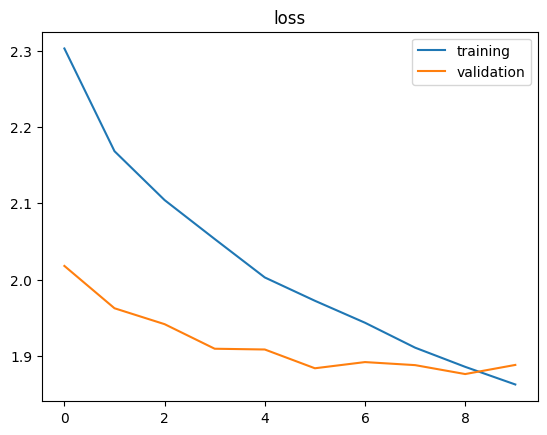

In [87]:
plt.plot(history.history['loss'],    label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.title('loss')
plt.legend()

In [88]:
test_predict = model.predict(X_test_rnn)
test_predict

87/87 [==============================] - 2s 5ms/step


array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)

In [89]:
test_predict.shape

(2782, 2)

In [90]:
y_test_rnn

array([[7., 1.],
       [6., 1.],
       [5., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

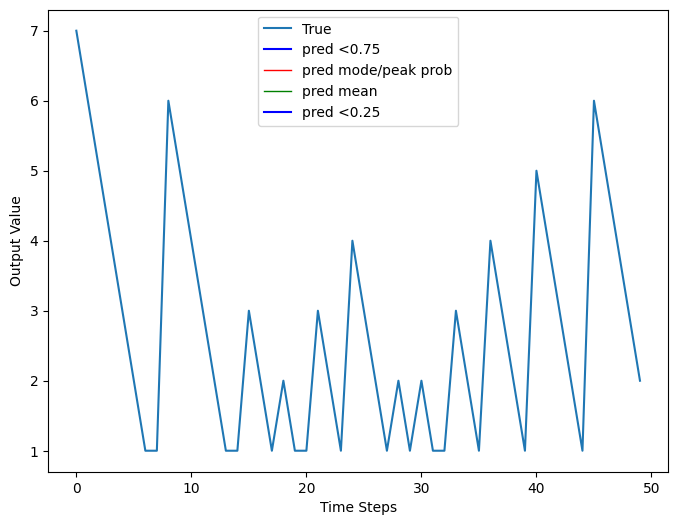

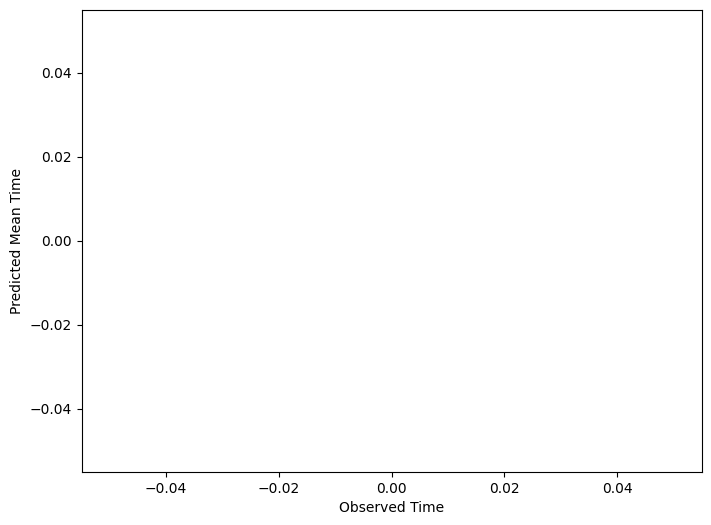

In [91]:
from six.moves import xrange
drawstyle = 'steps-post'

a = test_predict[:,0]
b = test_predict[:,1]
t = np.array(xrange(len(a)))

# Plotting test_predict against test_y
plt.figure(figsize=(8, 6))
plt.plot(y_test_rnn[0:50, 0], label='True')
# plt.plot(test_predict[:10000, 0], color='yellow', label='Predicted')
plt.plot(weibull.quantiles(a,b,0.75)[0:50],color='blue',label='pred <0.75',drawstyle=drawstyle)
plt.plot(weibull.mode(a, b)[0:50], color='red',linewidth=1,label='pred mode/peak prob',drawstyle=drawstyle)
plt.plot(weibull.mean(a, b)[0:50], color='green',linewidth=1,label='pred mean',drawstyle='steps-post')
plt.plot(weibull.quantiles(a,b,0.25)[0:50],color='blue',label='pred <0.25',drawstyle=drawstyle)
plt.xlabel('Time Steps')
plt.ylabel('Output Value')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_rnn[:, 0], weibull.mean(a, b))
plt.xlabel('Observed Time')
plt.ylabel('Predicted Mean Time')
plt.show()

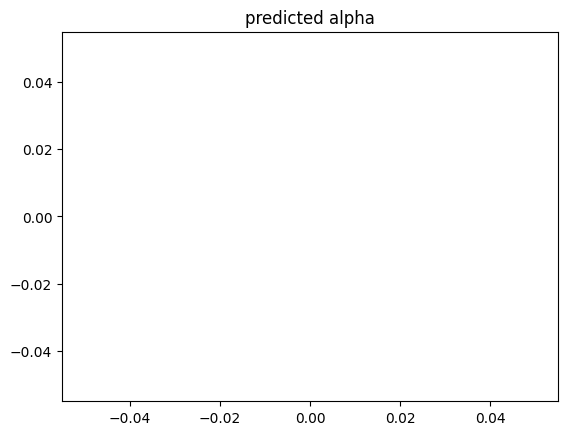

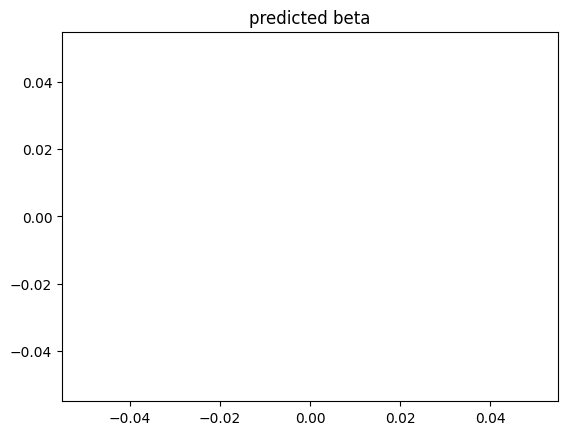

In [92]:
plt.plot(a,drawstyle='steps-post')
plt.title('predicted alpha')
plt.show()
plt.plot(b,drawstyle='steps-post')
plt.title('predicted beta')
plt.show()

In [93]:
test_predict.shape

(2782, 2)

In [94]:
def plot_weibull_distribution(alpha, beta):
    # Generate x-values for the plot
    x = np.linspace(0, 10, 100)

    # Create a Weibull distribution object
    weibull_dist = weibull_min(alpha, scale=beta)

    # Compute the probability density function (PDF) for each x-value
    pdf = weibull_dist.pdf(x)

    # Plot the PDF
    plt.plot(x, pdf)
    plt.title("Weibull Distribution")
    plt.xlabel("Value")
    plt.ylabel("Probability Density")
    plt.show()


Predicted value: 1.0043481417852411


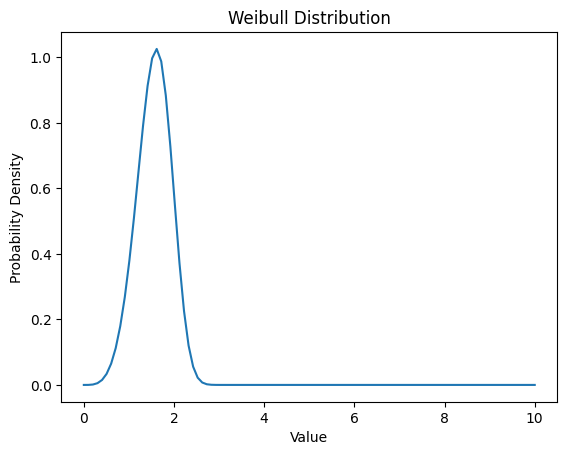

In [95]:
from scipy.stats import weibull_min

def predict_event_time(alpha, beta):
    # Generate a Weibull distribution object
    weibull_dist = weibull_min(alpha, scale=(beta-1.5)*4)
    #plot_weibull_distribution(alpha, beta)

    # Get the predicted value
    predicted_value = weibull_dist.ppf(0.95)

    return predicted_value

def predict_next_one_over_percentage(alpha, beta):
    # Generate a Weibull distribution object
    weibull_dist = weibull_min(alpha, scale=beta)
    plot_weibull_distribution(alpha, beta)
    # Get the predicted value
    predicted_value = weibull_dist.cdf(1)
    
    return predicted_value

def predict_next_two_over_percentage(alpha, beta):
    # Generate a Weibull distribution object
    weibull_dist = weibull_min(alpha, scale=beta)
    plot_weibull_distribution(alpha, beta)
    # Get the predicted value
    predicted_value = weibull_dist.cdf(2)

    return predicted_value


# Example usage
alpha = 4.6162906
beta = 1.6979713

predicted_value = predict_event_time(alpha, beta)
print("Predicted value:", predicted_value)
plot_weibull_distribution(alpha, beta)


In [96]:
y_test_rnn.shape

(2782, 2)

In [97]:
test_predict

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)

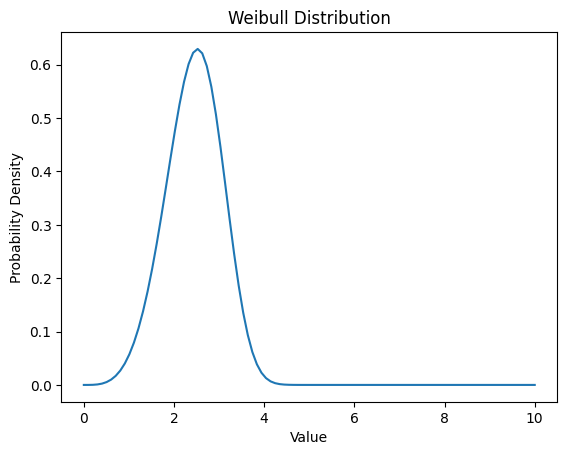

0.24112618304202757

In [98]:
predict_next_two_over_percentage(4.448327 , (2.0342863-1.5)*5)

## Calulcate the Predicted Event Time  Values

In [99]:
predicted_value = predict_event_time(alpha, beta)

In [100]:
test_predict.shape

(2782, 2)

In [101]:
y_test_rnn.shape

(2782, 2)

In [102]:
predicted_event_times = []
for values in test_predict:
    print('alpha and beta values are ' , values[0], values[1])
    alpha1 = values[0]
    beta1  = values[1]
    predicted_event_times.append(predict_event_time(alpha1, beta1))
    

alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta values are  nan nan
alpha and beta value

In [103]:
len(predicted_event_times)

2782

In [104]:
predicted_event_times

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [105]:
y_test_rnn[:,0].shape

(2782,)

In [106]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_rnn[:,0], predicted_event_times)
print(mae)

ValueError: Input contains NaN.

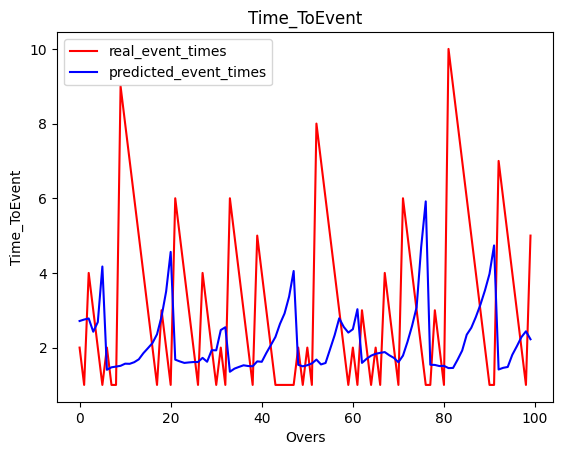

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test_rnn[:,0][200:300], color = 'red', label = 'real_event_times')
plt.plot(predicted_event_times[200:300], color = 'blue', label = 'predicted_event_times')
plt.title('Time_ToEvent')
plt.xlabel('Overs')
plt.ylabel('Time_ToEvent')
plt.legend()
plt.show()

In [ ]:
df_final

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
40,2021-10-24,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,1.0,0.0,0.0,2.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,32.54,138.96,4.0,22.0,6.0,252.0,133.0,111.0,103.0,15.0,2864.0,118.0,2061.0,1,1361,1.0,1.0
41,2021-10-24,0,0,0,0,0,3,2,1,1,1,210,8.000000,2.000000,2,1,1,0.0,0.0,0.0,4.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,0,1361,2.0,1.0
42,2021-10-24,6,1,2,0,0,4,7,3,3,1,210,8.000000,3.000000,6,1,2,1.0,1.0,0.0,8.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,1,1361,1.0,1.0
43,2021-10-24,6,0,4,0,0,4,5,7,4,1,210,8.000000,4.666667,14,2,3,0.0,0.0,1.0,7.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,3.0,1.0
44,2021-10-24,12,2,10,0,0,6,9,11,6,1,210,8.000000,5.250000,21,2,4,0.0,1.0,0.0,9.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,2,154,5.875000,8.916667,107,1,12,1.0,0.0,1.0,7.0,53.15,127.49,0.0,4.0,0.0,67.0,9.0,19.0,19.0,6.0,691.0,97.0,542.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,1,665,1.0,1.0
19106,2018-04-03,12,1,15,0,0,20,1,21,1,2,154,5.714286,8.769231,114,2,13,0.0,0.0,0.0,6.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665,4.0,1.0
19107,2018-04-03,12,1,26,2,0,6,21,2,22,2,154,5.666667,8.571429,120,2,14,0.0,0.0,1.0,12.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,0,665,3.0,1.0
19108,2018-04-03,18,1,21,1,0,24,11,26,8,2,154,4.400000,8.800000,132,2,15,0.0,0.0,0.0,7.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665,2.0,1.0
